# **Fake News Detection Model Using RNN - LSTM**

## **What is News?**

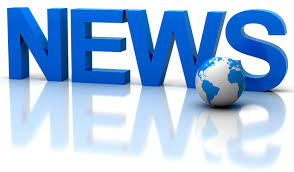

***News is information about current events. This may be provided through many different media: word of mouth, printing, postal systems, broadcasting, electronic communication, or through the testimony of observers and witnesses to events.***

***Common topics for news reports include war, government, politics, education, health, the environment, economy, business, fashion, and entertainment, as well as athletic events, quirky or unusual events. Government proclamations, concerning royal ceremonies, laws, taxes, public health, and criminals, have been dubbed news since ancient times. Technological and social developments, often driven by government communication and espionage networks, have increased the speed with which news can spread, as well as influenced its content. The genre of news as we know it today is closely associated with the newspaper.***

***In the modern days, or as we know it, in the generation of computers, we have seen a mass shift from the hard copy mode to the online mode of News perceiving.***

## **What is a Fake News?**

![](https://beconnected.esafety.gov.au/pluginfile.php/52815/mod_resource/content/12/fake-news-hero-img.jpg)

***Fake news is false or misleading information presented as news. It often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue. Media scholar Nolan Higdon has offered a more broad definition of fake news as "false or misleading content presented as news and communicated in formats spanning spoken, written, printed, electronic, and digital communication."***

***Once common in print, the prevalence of fake news has increased with the rise of social media, especially the Facebook News Feed. Political polarization, post-truth politics, confirmation bias, and social media algorithms have been implicated in the spread of fake news. It is sometimes generated and propagated by hostile foreign actors, particularly during elections. The use of anonymously-hosted fake news websites has made it difficult to prosecute sources of fake news for libel. In some definitions, fake news includes satirical articles misinterpreted as genuine, and articles that employ sensationalist or clickbait headlines that are not supported in the text.***

![](https://media.newyorker.com/photos/5f19f57a698a316b79e7c413/16:9/w_2560,h_1440,c_limit/Glasser-TrumpWallaceInterview.jpg)

***Fake news can reduce the impact of real news by competing with it; a Buzzfeed analysis found that the top fake news stories about the 2016 U.S. presidential election received more engagement on Facebook than top stories from major media outlets. It also has the potential to undermine trust in serious media coverage.The term has at times been used to cast doubt upon legitimate news, and U.S. president Donald Trump has been credited with popularizing the term by using it to describe any negative press coverage of himself. It has been increasingly criticized, due in part to Trump's misuse, with the British government deciding to avoid the term, as it is "poorly-defined" and "conflates a variety of false information, from genuine error through to foreign interference".***

## **Importing the Libraries**

In [1]:
import zipfile
import os
import requests
from wordcloud import WordCloud
import re
from nltk.stem import WordNetLemmatizer
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


def download_url(url, save_path, chunk_size=256):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

    os.mkdir(save_path.strip('.zip'))
    with zipfile.ZipFile(save_path, 'r') as zip_ref:
        zip_ref.extractall(save_path.strip('.zip'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

## **Reading the Dataset**
<img src="https://media.giphy.com/media/xUA7b2OfgTuVzqpVXq/giphy.gif" width="200"/>

In [5]:
fake = pd.read_csv("/content/DATASET/archive/Fake.csv")
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [6]:
real = pd.read_csv("/content/DATASET/archive/True.csv")
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

## **Exploratory Data Analysis**
<img src="https://media.giphy.com/media/JrXas5ecb4FkwbFpIE/giphy.gif" width="200">

***In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.***
<br><br>

***We will perform following steps:***



### **1. Counting by Subjects**

In [7]:
for key, count in fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")

# Getting Total Rows
print(f"Total Records:\t{fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


#### **Which Subjects have received the most News Coverage?**

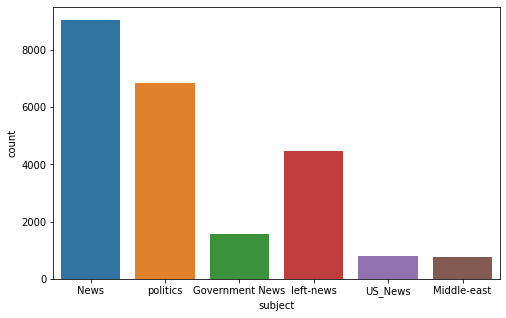

In [8]:
# For the Fake Data
plt.figure(figsize=(8, 5))
sns.countplot("subject", data=fake)
plt.show()

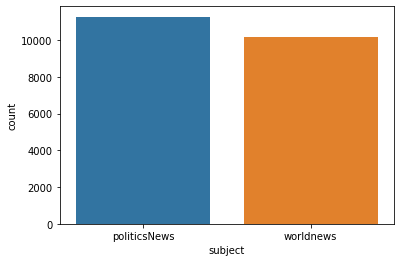

In [9]:
# For the Real Data
sns.countplot(x="subject", data=real)
plt.show()

### **2. Creating the TagCloud**

***A tagcloud (also known as a word cloud, wordle or weighted list in visual design) is a visual representation of text data, which is often used to depict keyword metadata on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color. When used as website navigation aids, the terms are hyperlinked to items associated with the tag.***

#### **Word Cloud using the Fake News Dataset**
<img src="https://static2.bigstockphoto.com/0/0/2/large1500/200144554.jpg" width="500">

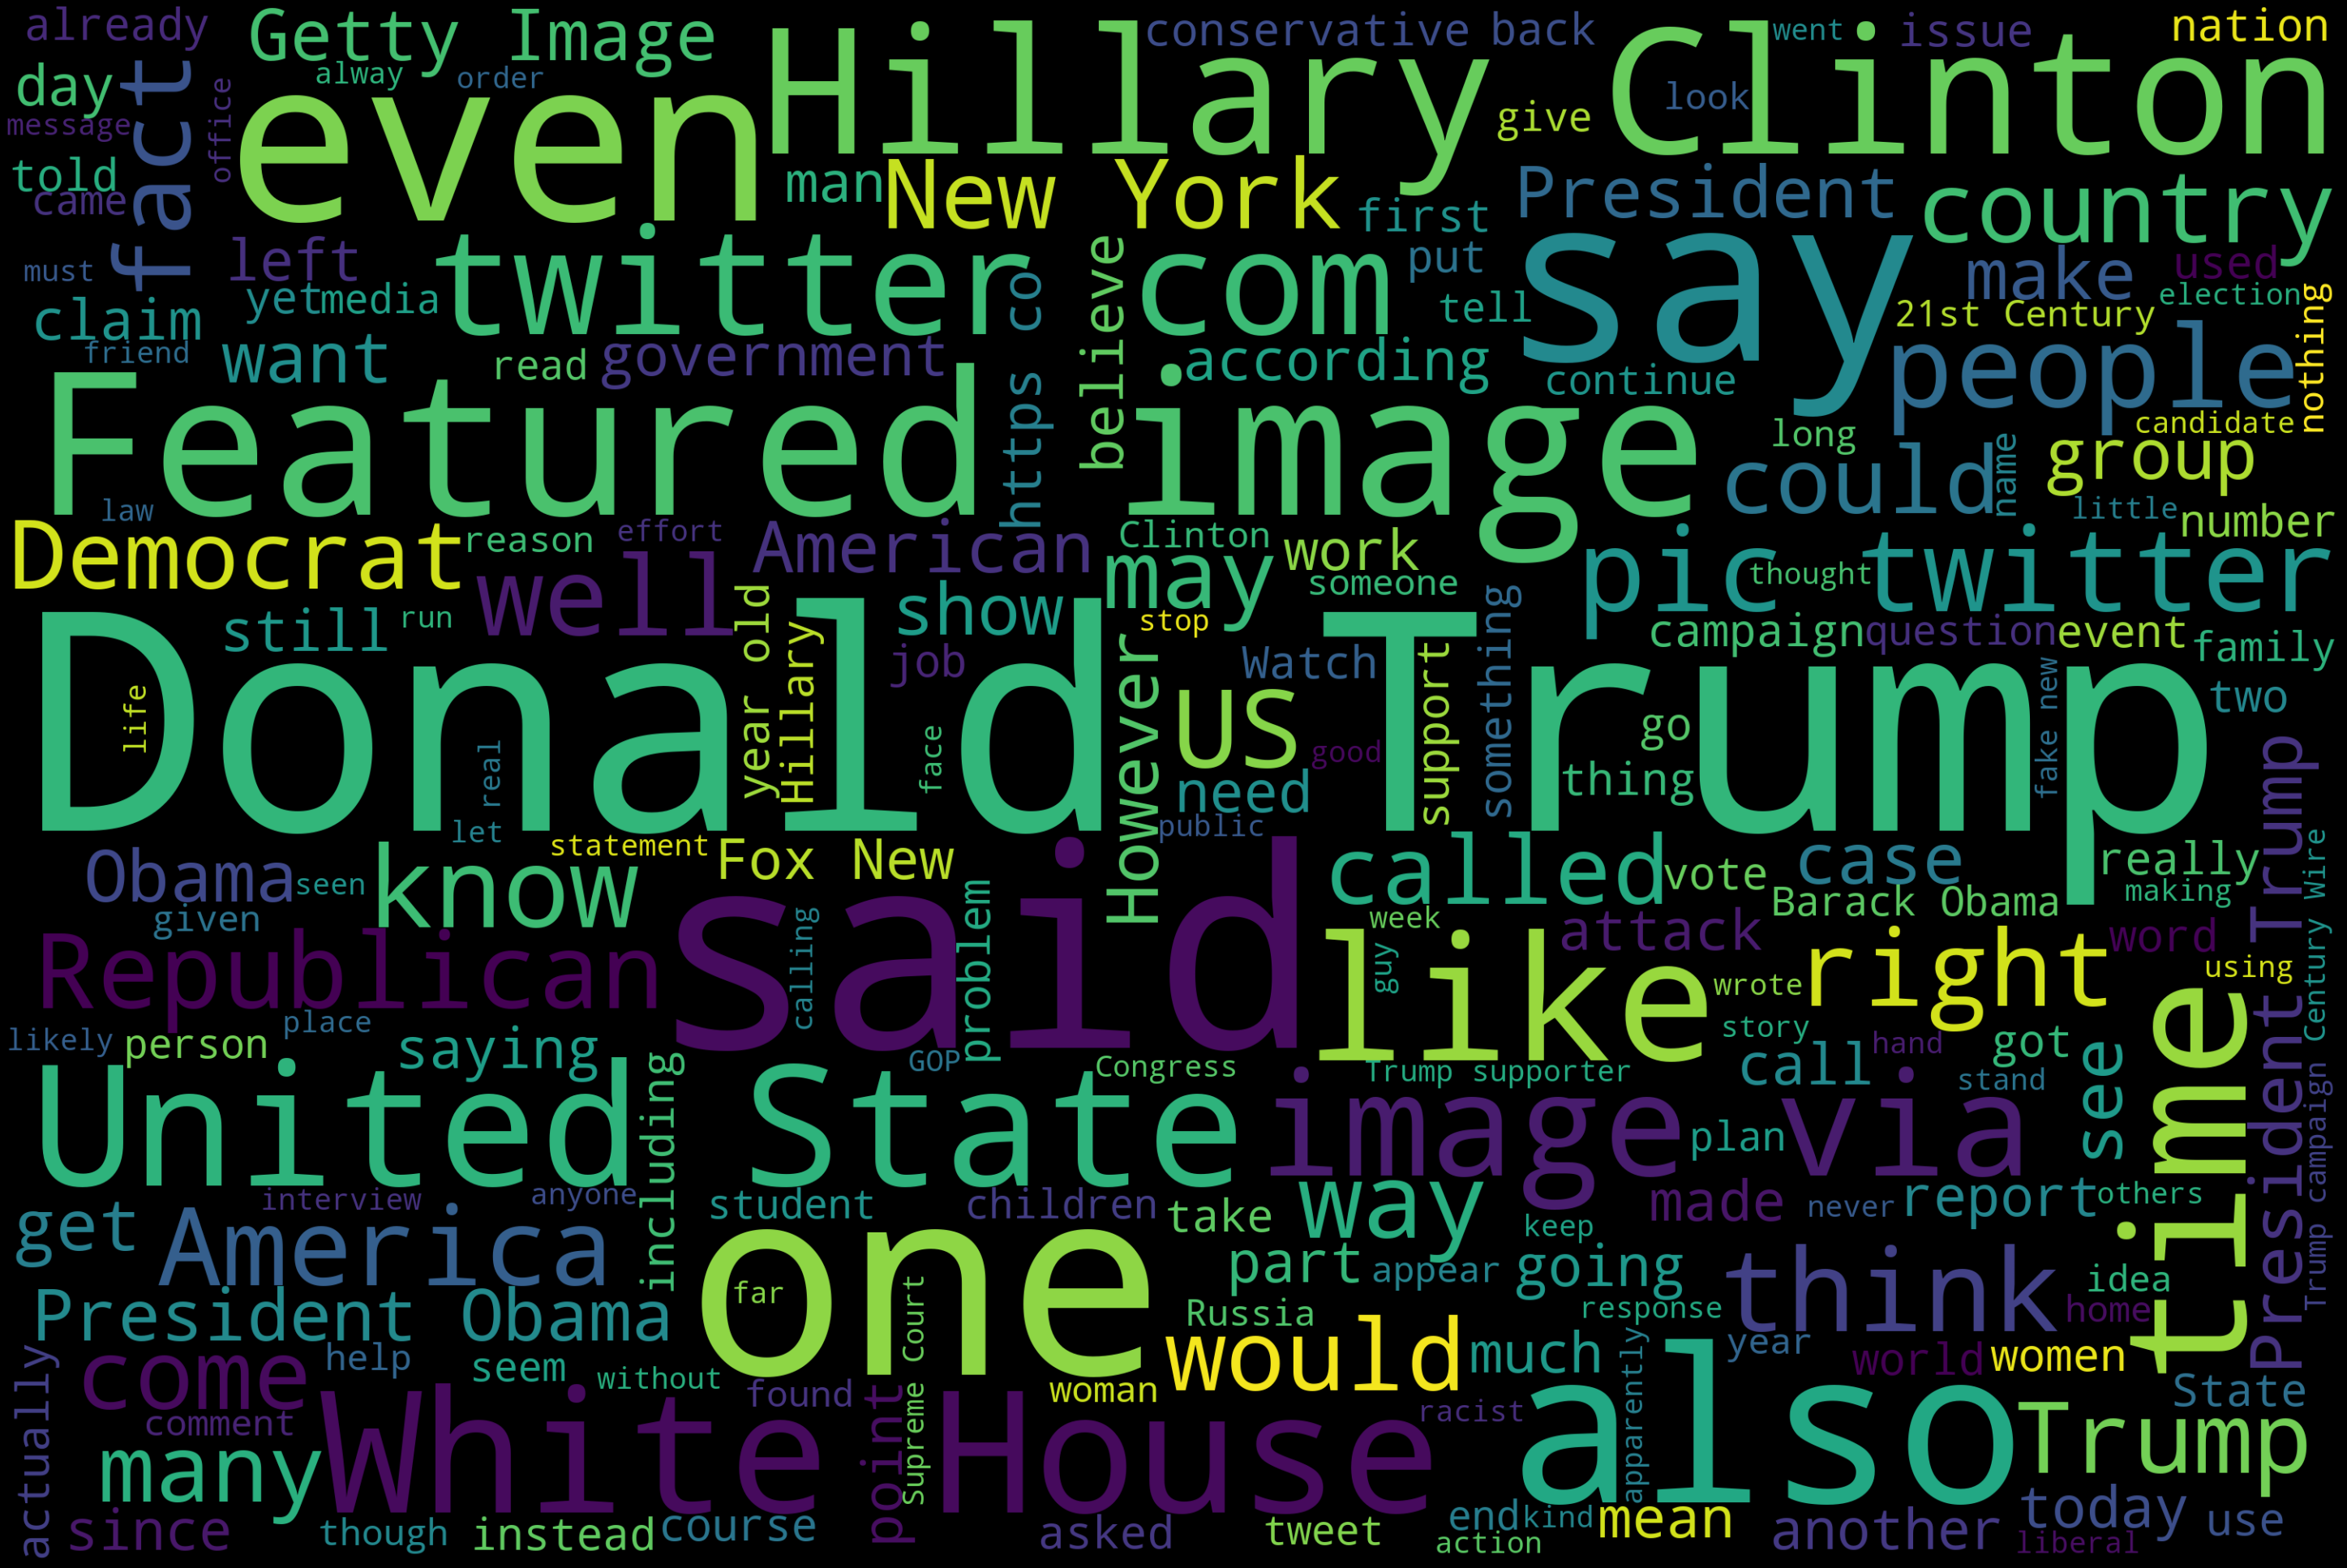

In [10]:
# Word Cloud
text = ''
for news in fake.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    stopwords=set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(figsize=(40, 30), facecolor='k', edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

#### **Word Cloud using the Real News Dataset**
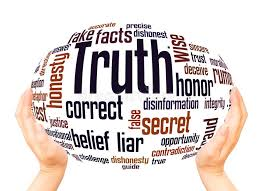

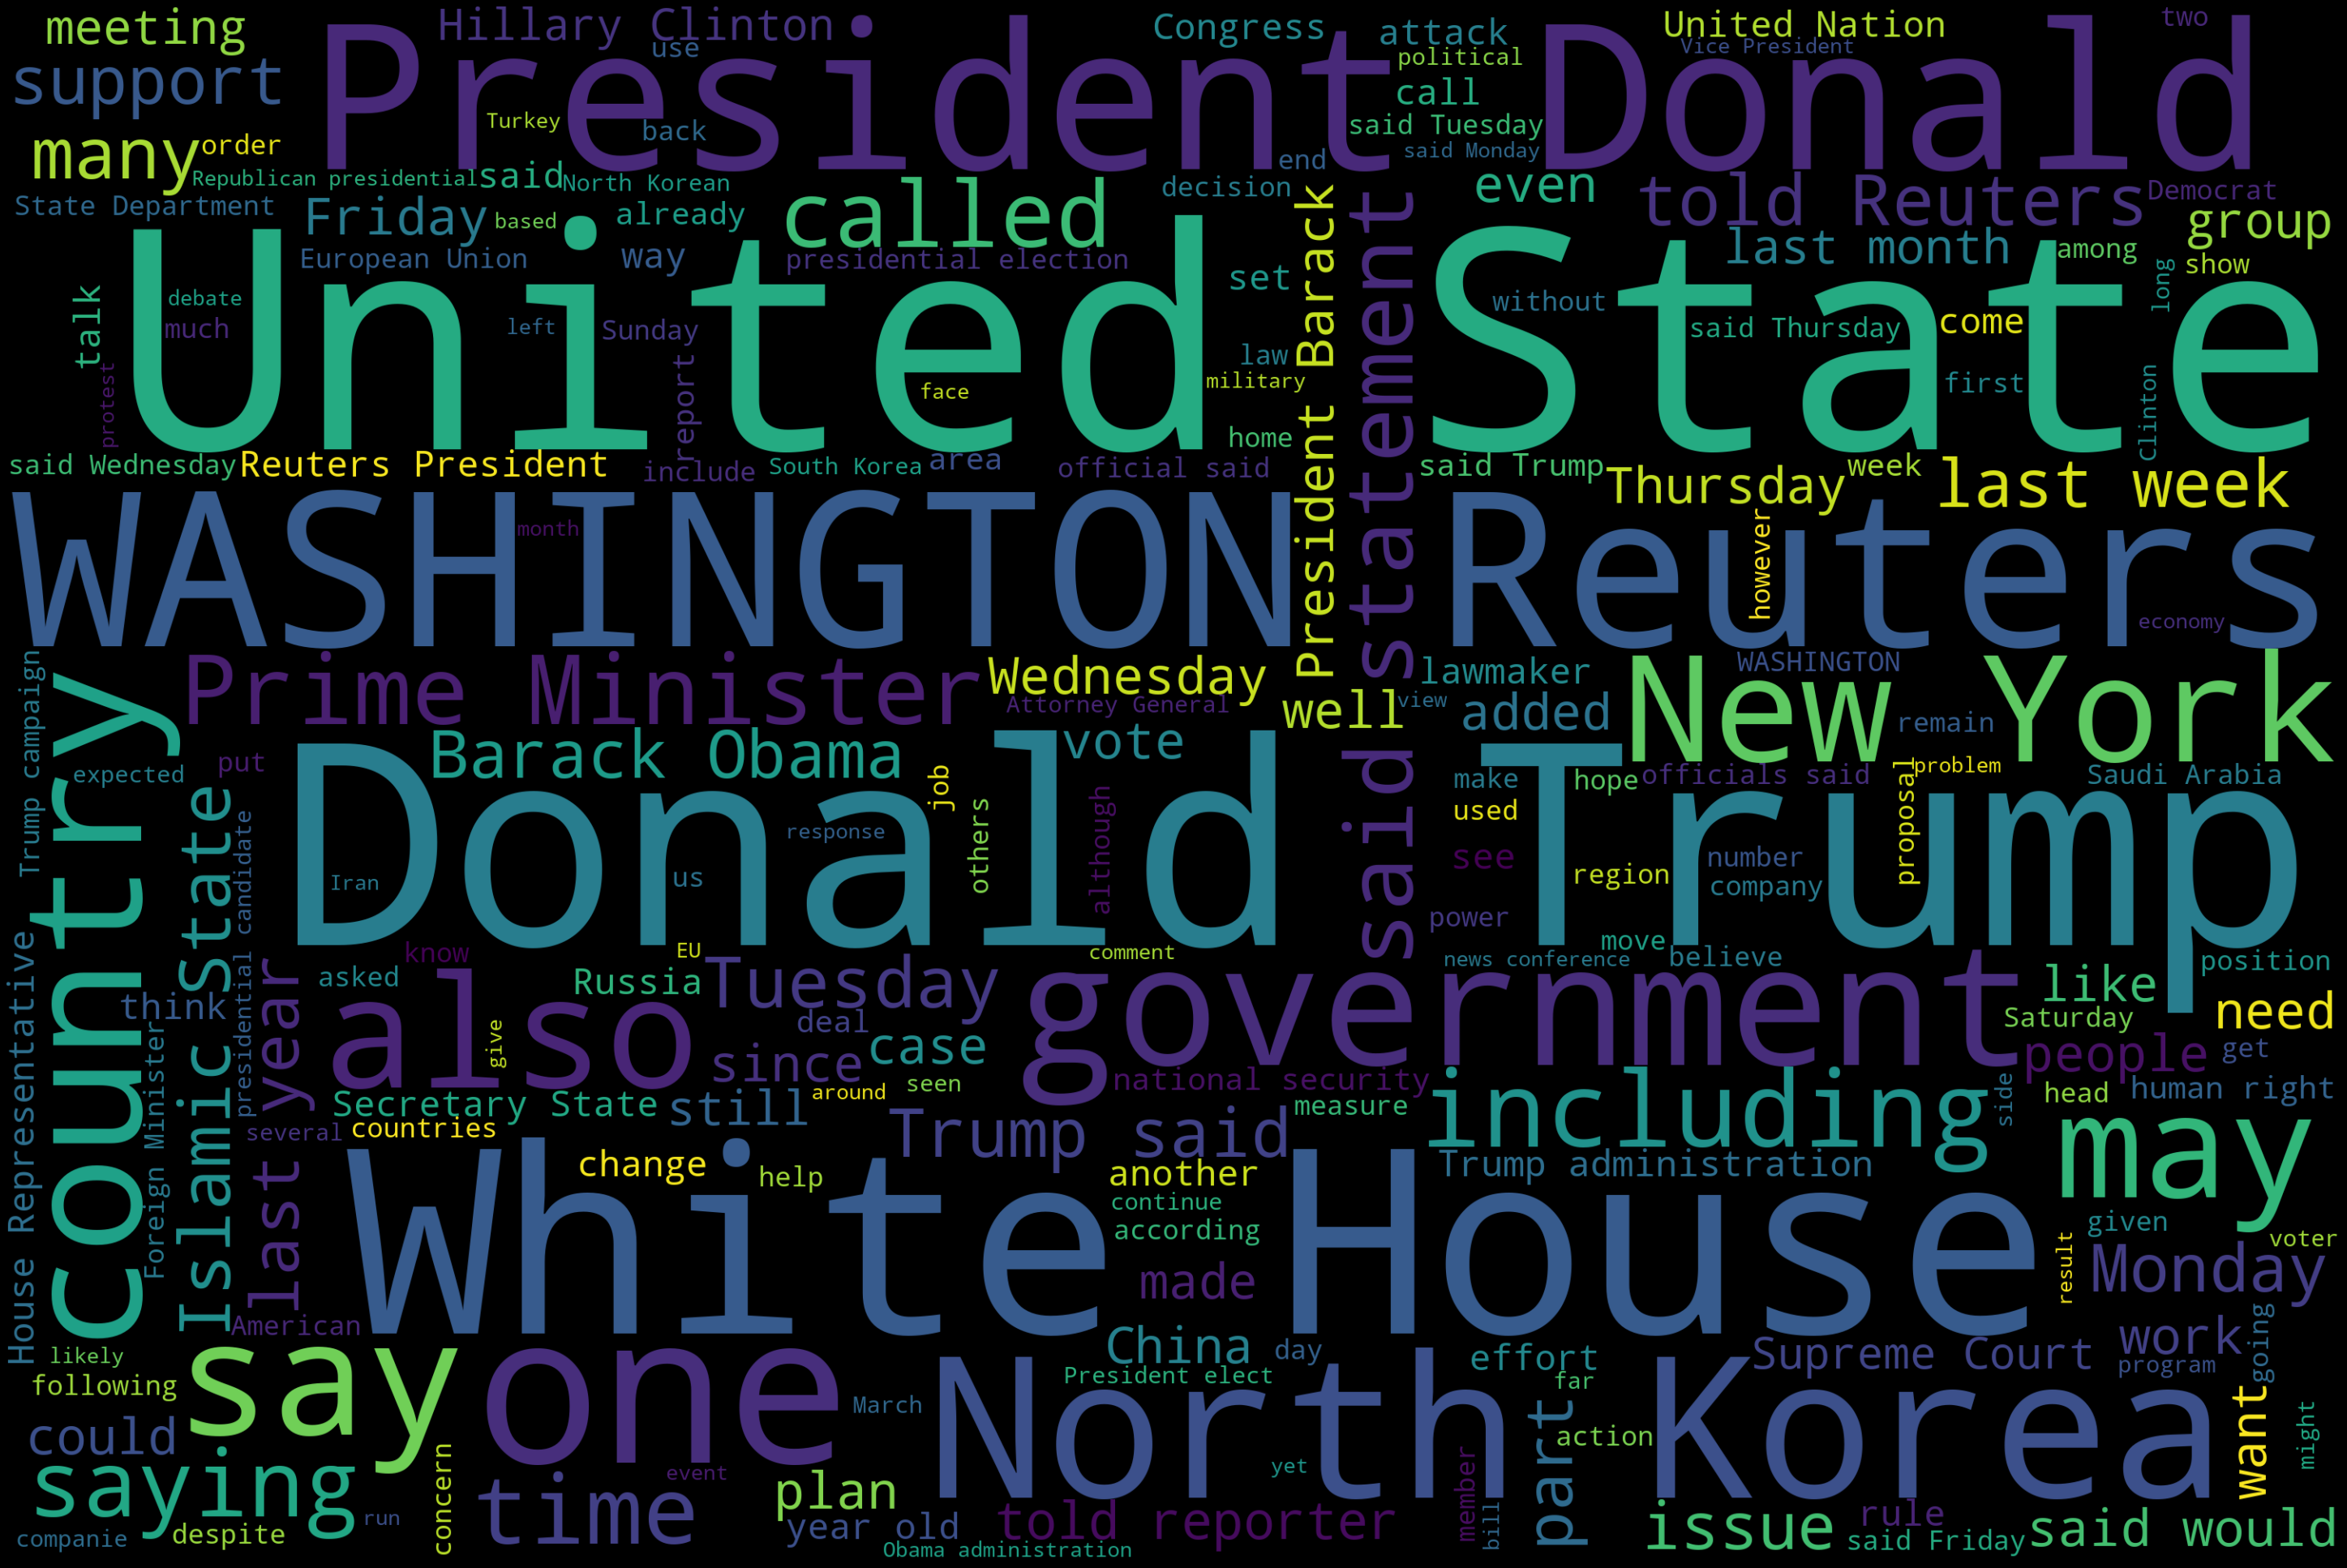

In [11]:
# WordCloud For Real News
text = ''
for news in real.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    stopwords=set(nltk.corpus.stopwords.words("english"))).generate(str(text))
fig = plt.figure(figsize=(40, 30), facecolor='k', edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

## **Data Cleaning**

***In Text data, there often exists components which might not be of any help to us. 
The main target of this section will be to remove those components- such that we can have a smoother analysis. We plan to create a function here that will be responsible to remove any unneccesary words (Stopwords) from the data provided- and slall be using this function if and when required during our analysis and prediction***

![](https://www.clorox.com/wp-content/uploads/2020/06/clx-hub-cleaning-sanitizing-730.png)


In [12]:
# First Creating list of index that do not have publication part
unknown_publishers = []
for index, row in enumerate(real.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        # if no text part is present, following will give error
        record[1]
        # if len of piblication part is greater than 260
        # following will give error, ensuring no text having "-" in between is counted
        assert (len(record[0]) < 260)
    except:
        unknown_publishers.append(index)

In [13]:
# Thus we have list of indices where publisher is not mentioned
# lets check
real.iloc[unknown_publishers].text
# true, they do not have text like "WASHINGTON (Reuters)"

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

In [14]:
# Seperating Publication info, from actual text
publisher = []
tmp_text = []
for index, row in enumerate(real.text.values):
    if index in unknown_publishers:
        # Add unknown of publisher not mentioned
        tmp_text.append(row)

        publisher.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    publisher.append(record[0])
    tmp_text.append(record[1])

In [15]:
# Replace existing text column with new text
# add seperate column for publication info
real["publisher"] = publisher
real["text"] = tmp_text

del publisher, tmp_text, record, unknown_publishers

In [16]:
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0   The head of a conservative Republican faction...  politicsNews   
1   Transgender people will be allowed for the fi...  politicsNews   
2   The special counsel investigation of links be...  politicsNews   
3   Trump campaign adviser George Papadopoulos to...  politicsNews   
4   President Donald Trump called on the U.S. Pos...  politicsNews   

                 date                     publisher  
0  December 31, 2017           WASHINGTON (Reuters)  
1  December 29, 2017           WASHINGTON (Reuters)  
2  December 31, 2017           WASHINGTON (Reuters)  
3  December 30, 2017           WASHINGTON (Reuters)  
4  December 29, 2017   SEATTLE/WASHINGTON (Reuters)

*New column called `Publisher` has been added.*


In [17]:
# checking for rows with empty text like row
[
    index for index, text in enumerate(real.text.values)
    if str(text).strip() == ''
]
# seems only one :)

[8970]

In [18]:
# dropping this record
real = real.drop(8970, axis=0)

In [19]:
# checking for the same in fake news
empty_fake_index = [
    index for index, text in enumerate(fake.text.values)
    if str(text).strip() == ''
]
print(f"No of empty rows: {len(empty_fake_index)}")
fake.iloc[empty_fake_index].tail()

No of empty rows: 630


title text    subject  \
21816  BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...       left-news   
21826  FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...       left-news   
21827  (VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...       left-news   
21857  (VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...       left-news   
21873  (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...       left-news   

               date  
21816  Apr 27, 2015  
21826  Apr 25, 2015  
21827  Apr 25, 2015  
21857  Apr 14, 2015  
21873  Apr 12, 2015

*`630` Rows in Fake news with empty text*

*Also noticed fake news have a lot of CPATIAL-CASES. Could preserve Cases of letters, but as we are using Google's pretrained word2vec vectors later on, which haswell-formed lower cases word. We will contert to lower case.*

*The text for these rows seems to be present in title itself. Lets merge title and text to solve these cases.*

In [20]:
# Looking at publication Information
# Checking if Some part of text has been included as publisher info... No such cases it seems

for name, count in real.publisher.value_counts().iteritems():
    print(f"Name: {name}\nCount: {count}\n")

Name: WASHINGTON (Reuters)
Count: 6389

Name: (Reuters)
Count: 1483

Name: LONDON (Reuters)
Count: 705

Name: NEW YORK (Reuters)
Count: 695

Name: MOSCOW (Reuters)
Count: 623

Name: BERLIN (Reuters)
Count: 499

Name: BEIJING (Reuters)
Count: 433

Name: BRUSSELS (Reuters)
Count: 346

Name: BEIRUT (Reuters)
Count: 346

Name: PARIS (Reuters)
Count: 301

Name: ANKARA (Reuters)
Count: 246

Name: MEXICO CITY (Reuters)
Count: 226

Name: TOKYO (Reuters)
Count: 207

Name: SEOUL (Reuters)
Count: 203

Name: GENEVA (Reuters)
Count: 197

Name: UNITED NATIONS (Reuters)
Count: 184

Name: MADRID (Reuters)
Count: 182

Name: DUBAI (Reuters)
Count: 174

Name: CAIRO (Reuters)
Count: 160

Name: MANILA (Reuters)
Count: 151

Name: HARARE (Reuters)
Count: 140

Name: ISTANBUL (Reuters)
Count: 140

Name: BAGHDAD (Reuters)
Count: 136

Name: CHICAGO (Reuters)
Count: 136

Name: NAIROBI (Reuters)
Count: 125

Name: SYDNEY (Reuters)
Count: 114

Name: JERUSALEM (Reuters)
Count: 107

Name: JOHANNESBURG (Reuters)
Count:

In [21]:
# Getting Total Rows
print(f"Total Records:\t{real.shape[0]}")

# Counting by Subjects
for key, count in real.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")

Total Records:	21416
politicsNews:	11271
worldnews:	10145


### **Preprocessing Text**

![](https://miro.medium.com/max/1400/1*pzjECYWP8WOWhwfCjebZVw.png)

In [22]:
# Adding class Information
real["class"] = 1
fake["class"] = 0

In [23]:
# Combining Title and Text
real["text"] = real["title"] + " " + real["text"]
fake["text"] = fake["title"] + " " + fake["text"]

In [24]:
# Subject is diffrent for real and fake thus dropping it
# Aldo dropping Date, title and Publication Info of real
real = real.drop(["subject", "date", "title", "publisher"], axis=1)
fake = fake.drop(["subject", "date", "title"], axis=1)

In [25]:
# Combining both into new dataframe
data = real.append(fake, ignore_index=True)
del real, fake

In [26]:
# Download following if not downloaded in local machine

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

***Performing Preprocessing Steps:***

***Normalization => Tokenization => Removing Stop Words => Lemmatization***

In [27]:
y = data["class"].values
# Converting X to format acceptable by gensim, removing annd punctuation stopwords in the process
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
for par in data["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()  # normalization
        tokens = tokenizer.tokenize(sent)  # tokenization
        filtered_words = [  # lemmatization
            lemmatizer.lemmatize(w.strip()) for w in tokens
            if w not in stop_words and len(w) > 1
        ]
        tmp.extend(filtered_words)
    X.append(tmp)

del data

## **Word Embedding**

***Word embeddings is a technique where individual words are transformed into a numerical representation of the word (a vector). Where each word is mapped to one vector, this vector is then learned in a way which resembles a neural network. The vectors try to capture various characteristics of that word with regard to the overall text. These characteristics can include the semantic relationship of the word, definitions, context, etc. With these numerical representations, you can do many things like identify similarity or dissimilarity between words.***

![](https://gdcoder.com/content/images/2019/06/Screen-Shot-2019-06-14-at-00.13.04.png)

***Clearly, these are integral as inputs to various aspects of machine learning. A machine cannot process text in their raw form, thus converting the text into an embedding will allow users to feed the embedding to classic machine learning models.***

### Word2Vec --Vectorization

***Word2vec is a technique for natural language processing published in 2013. The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text. Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence.***

![](https://miro.medium.com/max/1158/1*aaMLVYSbAe086KowQQl6zw.png)


***As the name implies, word2vec represents each distinct word with a particular list of numbers called a vector. The vectors are chosen carefully such that a simple mathematical function (the cosine similarity between the vectors) indicates the level of semantic similarity between the words represented by those vectors.***

In [34]:
# invoke garbage collector to free ram
import gc

gc.collect()

97

In [35]:
from gensim.models.keyedvectors import KeyedVectors

In [36]:
# Takes RAM
# is essentially a mapping between keys and vectors. Each vector is identified by its lookup key,
# most often a short string token, so this is usually a mapping between {str => 1D numpy array}.

word_vectors = KeyedVectors.load_word2vec_format(
    '/content/DATASET/archive_google/GoogleNews-vectors-negative300.bin',
    binary=True)
EMBEDDING_DIM = 300

In [38]:
# vocab size
len(word_vectors.wv.index2word)

# We have now represented each of  words by a 300dim vector.

3000000

In [39]:
# Tokenizing Text -> Repsesenting each word by a number
# Mapping of orginal word to number is preserved in word_index property of tokenizer

# Tokenized applies basic processing like changing it yo lower case
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [40]:
# lets check the first 10 words of first news
# every word has been represented with a number
X[0][:10]

[400, 388, 7974, 8, 4744, 1289, 4339, 243, 132, 8]

In [41]:
# Lets check few word to numerical replesentation
# Mapping is preserved in "dictionary -> word_index" property of instance
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break

trump -> 1
said -> 2
state -> 3
president -> 4
would -> 5
people -> 6
year -> 7
republican -> 8
one -> 9
new -> 10


***We can pass numerical representation of words into neural network.***

***We can use Many-To-One (Sequence-To-Word) Model of `RNN - LSTM` , as we have many words in news as input and one output i.e. Probability of being Real.***


In [42]:
len([len(x) for x in X])

44897

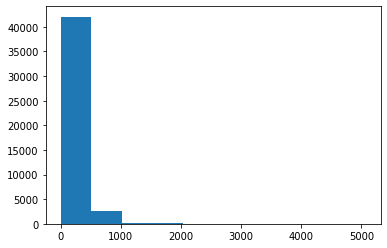

In [43]:
# For determining size of input...

# Making histogram for no of words in news shows that most news article are under 700 words.
# Lets keep each news small and truncate all news to 700 while tokenizing
plt.hist([len(x) for x in X])
plt.show()

# Its heavily skewed. There are news with 5000 words? Lets truncate these outliers :)

In [44]:
nos = np.array([len(x) for x in X])
len(nos[nos < 700])
# Out of 48k news, 43k have less than 700 words

43982

## **Word Padding**

***As we know all the neural networks needs to have the inputs that should be in similar shape and size. When we pre-process the texts and use the texts as an inputs for our Model.***

![](https://i.ibb.co/YcH7g4j/image.png)

***In other words, naturally, some of the sentences are longer or shorter. We need to have the inputs with the same size, this is where the padding is necessary. When a sentence exceeds the number of max words, then it will drop the words and by default setting, it will drop the words at the beginning of the sentence.***

In [45]:
# Lets keep all news to 700, add padding to news with less than 700 words and truncating long ones
maxlen = 700

# Making all news of size maxlen defined above
X = pad_sequences(X, maxlen=maxlen)

In [46]:
# all news has 700 words (in numerical form now). If they had less words, they have been padded with 0
# 0 is not associated to any word, as mapping of words started from 1
# 0 will also be used later, if unknows word is encountered in test set
len(X[0])

700

## **Preparaing Machine Learning Model**

![](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/06/What-Is-Machine-Learning-Artificial-Intelligence-With-Python-Edureka.png)


In [47]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s).
# This Vector is filled with zeros.Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [48]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i] = np.random.normal(0, np.sqrt(0.25), EMBEDDING_DIM)

del word_vectors

- ***We Create a matrix of mapping between word-index and vectors. We use this as weights in embedding layer***

- ***Embedding layer accepts numecical-token of word and outputs corresponding vercor to inner layer.***

- ***It sends vector of zeros to next layer for unknown words which would be tokenized to 0.***

- ***Input length of Embedding Layer is the length of each news (700 now due to padding and truncating)***

In [49]:
model = Sequential()
model.add(
    Embedding(vocab_size,
              output_dim=EMBEDDING_DIM,
              weights=[embedding_matrix],
              input_length=maxlen,
              trainable=False))
model.add(Conv1D(activation='relu', filters=4, kernel_size=4))
model.add(MaxPool1D())
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="auto",
                                        patience=5,
                                        verbose=1,
                                        restore_best_weights=True)
#del embedding_matrix

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 300)          34169400  
                                                                 
 conv1d (Conv1D)             (None, 697, 4)            4804      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 348, 4)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 128)               68096     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 34,242,429
Trainable params: 73,029
Non-trainable params: 34,169,400
_______________________________________

### ***1. Creating Training & testing Data***

In [51]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.2)

### ***2. Training The Model***

In [52]:
model.fit(X_train,
          y_train,
          validation_split=0.3,
          epochs=25,
          batch_size=128,
          validation_data=(X_val, y_val),
          callbacks=[earlystopping])

Epoch 1/25
172/172 [==============================] - 21s 42ms/step - loss: 0.5487 - acc: 0.7579 - val_loss: 0.2679 - val_acc: 0.9017
Epoch 2/25
172/172 [==============================] - 6s 37ms/step - loss: 0.3002 - acc: 0.8899 - val_loss: 0.2529 - val_acc: 0.9005
Epoch 3/25
172/172 [==============================] - 6s 37ms/step - loss: 0.2948 - acc: 0.8905 - val_loss: 0.2198 - val_acc: 0.9292
Epoch 4/25
172/172 [==============================] - 6s 36ms/step - loss: 0.2581 - acc: 0.9099 - val_loss: 0.1958 - val_acc: 0.9384
Epoch 5/25
172/172 [==============================] - 6s 36ms/step - loss: 0.2693 - acc: 0.8949 - val_loss: 0.1736 - val_acc: 0.9377
Epoch 6/25
172/172 [==============================] - 6s 36ms/step - loss: 0.2603 - acc: 0.9009 - val_loss: 0.1641 - val_acc: 0.9344
Epoch 7/25
172/172 [==============================] - 6s 36ms/step - loss: 0.1731 - acc: 0.9338 - val_loss: 0.1243 - val_acc: 0.9542
Epoch 8/25
172/172 [==============================] - 6s 36ms/step -

### ***3. Prediction By The Model - How much accurately can we predict if the News is True or Fake?***

<img src='https://s.wsj.net/public/resources/images/ON-CJ684_quizgr_B620_20171229134559.jpg' >

In [53]:
# Prediction is in probability of news being real, so converting into classes
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred = (model.predict(X_test) >= 0.5).astype("int")

# Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

![](https://miro.medium.com/max/1400/1*ZobYhjM4ZfK9eVXluecg3g.jpeg)

In [54]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = [
            "{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)
        ]
    else:
        group_percentages = blanks

    box_labels = [
        f"{v1}{v2}{v3}".strip()
        for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)
    ]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize == None:
        # Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks == False:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,
                annot=box_labels,
                fmt="",
                cmap=cmap,
                cbar=cbar,
                xticklabels=categories,
                yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

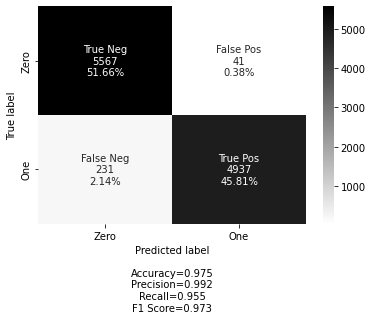

In [55]:
cf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')

## **Evaluating The Model**

***Whenever we build Machine Learning models, we need some form of metric used
for the measurement of the goodness of the model. Bear in mind that the “goodness”
of the model could have multiple interpretations, but generally when we speak of it in
a Machine Learning context, we are talking of the measure of a model's performance
on new instances that weren’t a part of the training data.***
<br><br>


<img src='https://miro.medium.com/max/714/1*6UJvbvmXGmeAwGh2Fyd58Q.jpeg' width=500>

<br><br>

***Some common intrinsic metrics to evaluate NLP systems are as follows:***

- ***Accuracy :- The accuracy of a Machine Learning classification algorithm is one way to measure how often the algorithm classifies a data point correctly. Accuracy is the number of correctly predicted data points out of all the data points.***

<img src='https://i.ibb.co/bH27MLX/image.png'>

- ***Precision :- Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances.***

<img src='https://miro.medium.com/max/888/1*C3ctNdO0mde9fa1PFsCVqA.png'>

- ***Recall :- Recall measures the proportion of actual positive labels correctly identified by the model.***

<img src='https://miro.medium.com/max/836/1*dXkDleGhA-jjZmZ1BlYKXg.png'>


In [56]:
accuracy_score(y_test, y_pred)

0.9747587230883444

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5608
           1       0.99      0.96      0.97      5168

    accuracy                           0.97     10776
   macro avg       0.98      0.97      0.97     10776
weighted avg       0.98      0.97      0.97     10776



# THANK YOU

<img src='https://media.giphy.com/media/F0J0uiNS8n0BHSQmDt/giphy.gif' width=300>